In [5]:
import csv
import matplotlib.pyplot as plt
from matplotlib.pyplot import figure
from matplotlib import colors as mcolors
import os
from datetime import datetime
import bisect 
import re

colors = dict(mcolors.BASE_COLORS, **mcolors.CSS4_COLORS)

In [6]:
def scanLog(csvlogpath, txt_to_search, txt_field, printit = False):
    with open(csvlogpath) as csvfile:
        print('SCANNING ' + csvlogpath)
        reader = csv.DictReader(csvfile)
        count = 0
        data = []
        
        for row in reader:
            is_ok = True
            for i in range(len(txt_field)):
                
                pattern = re.compile(txt_to_search[i])
                if pattern.match(row[txt_field[i]]):
                    is_ok = True
                else:
                    is_ok = False
                    break
            
            if is_ok:
                count += 1
                
                my_val = {}
                for i in range(len(txt_field)):
                    my_val[txt_field[i]] = row[txt_field[i]]
                #data.append(my_val)
                data.append(row)
            
        return {'count': count, 'value': data}
    
def plotLines(data,opt = {}, logit= False):
    for d in data:
        my_color = None
        if 'color' in opt:
            if d in opt['color']:
                my_color = opt['color'][d]

        my_width = None
        if 'width' in opt:
            if d in opt['width']:
                my_width = opt['width'][d]
        plt.plot(data[d]['x'],data[d]['y'], label=d, color=my_color, linewidth=my_width)
        if logit:
            plt.yscale('log')
            
        plt.xticks(data[d]['x'],[item.strftime('%Y-%m') for item in data[d]['x']])
    return plt

def plotPie(data,opt ={}, logit= False):
    
    #explode = (0.05, 0.05, 0.05, 0.05)
   #autopct='%1.1f%%' 
    fig1, ax1 = plt.subplots()
    ax1.pie(data['sizes'], labels=data['labels'])
    ax1.axis('equal')  # Equal aspect ratio ensures that pie is drawn as a circle.
    return plt
    

In [7]:
def buildData(txt_list, txt_field_list, csvpath):
    data = {'x':[],'y':[],'value':[]}
    for filename in os.listdir(csvpath):
        if filename.endswith(".csv"): 
            csvlogpath = csvpath+filename
            scanner = scanLog(csvlogpath,txt_list, txt_field_list)
            date = filename.replace("oc-", "").replace(".csv", "")

            date_val = datetime.strptime(date, '%Y-%m')
            bisect.insort(data['x'],date_val) 
            ord_index = data['x'].index(date_val)
            data['y'].insert(ord_index,scanner['count'])
            data['value'].insert(ord_index,scanner['value'])
        else:
            continue
        
    return data

In [8]:
csvpath = '/Users/ivan.heibi/opencitations/sci_framework/log_data/csv/'
#TIME,REMOTE_ADDR,HTTP_USER_AGENT,HTTP_REFERER(from),HTTP_HOST,REQUEST_URI(to)

In [9]:
#-------------------------------------------------------------------------------------------------#
#General usage of each different service
alldata = {}

In [10]:
alldata['OSCAR'] = buildData(['.*(/search)'], ['REQUEST_URI'], csvpath)

SCANNING /Users/ivan.heibi/opencitations/sci_framework/log_data/csv/oc-2018-04.csv
SCANNING /Users/ivan.heibi/opencitations/sci_framework/log_data/csv/oc-2018-05.csv
SCANNING /Users/ivan.heibi/opencitations/sci_framework/log_data/csv/oc-2018-07.csv
SCANNING /Users/ivan.heibi/opencitations/sci_framework/log_data/csv/oc-2018-06.csv
SCANNING /Users/ivan.heibi/opencitations/sci_framework/log_data/csv/oc-2018-02.csv
SCANNING /Users/ivan.heibi/opencitations/sci_framework/log_data/csv/oc-2018-03.csv
SCANNING /Users/ivan.heibi/opencitations/sci_framework/log_data/csv/oc-2018-08.csv
SCANNING /Users/ivan.heibi/opencitations/sci_framework/log_data/csv/oc-2018-09.csv


In [11]:
alldata['LUCINDA'] = buildData(['.*(/browse)'], ['REQUEST_URI'], csvpath)

SCANNING /Users/ivan.heibi/opencitations/sci_framework/log_data/csv/oc-2018-04.csv
SCANNING /Users/ivan.heibi/opencitations/sci_framework/log_data/csv/oc-2018-05.csv
SCANNING /Users/ivan.heibi/opencitations/sci_framework/log_data/csv/oc-2018-07.csv
SCANNING /Users/ivan.heibi/opencitations/sci_framework/log_data/csv/oc-2018-06.csv
SCANNING /Users/ivan.heibi/opencitations/sci_framework/log_data/csv/oc-2018-02.csv
SCANNING /Users/ivan.heibi/opencitations/sci_framework/log_data/csv/oc-2018-03.csv
SCANNING /Users/ivan.heibi/opencitations/sci_framework/log_data/csv/oc-2018-08.csv
SCANNING /Users/ivan.heibi/opencitations/sci_framework/log_data/csv/oc-2018-09.csv


In [12]:
alldata['RAMOSE'] = buildData(['.*(/api)'], ['REQUEST_URI'], csvpath)

SCANNING /Users/ivan.heibi/opencitations/sci_framework/log_data/csv/oc-2018-04.csv
SCANNING /Users/ivan.heibi/opencitations/sci_framework/log_data/csv/oc-2018-05.csv
SCANNING /Users/ivan.heibi/opencitations/sci_framework/log_data/csv/oc-2018-07.csv
SCANNING /Users/ivan.heibi/opencitations/sci_framework/log_data/csv/oc-2018-06.csv
SCANNING /Users/ivan.heibi/opencitations/sci_framework/log_data/csv/oc-2018-02.csv
SCANNING /Users/ivan.heibi/opencitations/sci_framework/log_data/csv/oc-2018-03.csv
SCANNING /Users/ivan.heibi/opencitations/sci_framework/log_data/csv/oc-2018-08.csv
SCANNING /Users/ivan.heibi/opencitations/sci_framework/log_data/csv/oc-2018-09.csv


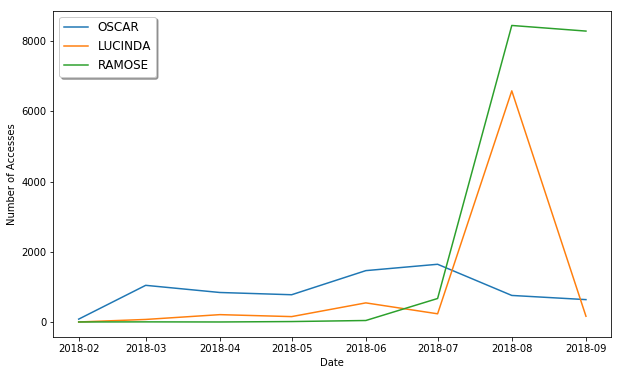

In [19]:
#plotLines(alldata,opt = {'color':{'OSCAR':'navy','LUCINDA':'orangered','RAMOSE':'darkgreen'}})
plotLines(alldata)
plt.legend(loc='upper left', shadow=True, fontsize='large')
plt.ylabel('Number of Accesses')
plt.xlabel('Date')
#figure(figsize=(18,14))
plt.rcParams['figure.figsize'] = (10,6)
plt.show()

In [16]:
#-------------------------------------------------------------------------------------------------#
#Moving from OSCAR to LUCINDA using the different corpuses 
data_moves = {}

In [17]:
data_moves['OSCAR_to_LUCINDA'] = buildData(['.*(\/search)','.*(\/browse)'], ['HTTP_REFERER','REQUEST_URI'], csvpath)

SCANNING /Users/ivan.heibi/opencitations/sci_framework/log_data/csv/oc-2018-04.csv
SCANNING /Users/ivan.heibi/opencitations/sci_framework/log_data/csv/oc-2018-05.csv
SCANNING /Users/ivan.heibi/opencitations/sci_framework/log_data/csv/oc-2018-07.csv
SCANNING /Users/ivan.heibi/opencitations/sci_framework/log_data/csv/oc-2018-06.csv
SCANNING /Users/ivan.heibi/opencitations/sci_framework/log_data/csv/oc-2018-08.csv
SCANNING /Users/ivan.heibi/opencitations/sci_framework/log_data/csv/oc-2018-09.csv


In [18]:
data_moves['Directly_to_LUCINDA'] = buildData(['^((?!\/browse|\/search|\/api).)*$','.*(\/browse)'], ['HTTP_REFERER','REQUEST_URI'], csvpath)

SCANNING /Users/ivan.heibi/opencitations/sci_framework/log_data/csv/oc-2018-04.csv
SCANNING /Users/ivan.heibi/opencitations/sci_framework/log_data/csv/oc-2018-05.csv
SCANNING /Users/ivan.heibi/opencitations/sci_framework/log_data/csv/oc-2018-07.csv
SCANNING /Users/ivan.heibi/opencitations/sci_framework/log_data/csv/oc-2018-06.csv
SCANNING /Users/ivan.heibi/opencitations/sci_framework/log_data/csv/oc-2018-08.csv
SCANNING /Users/ivan.heibi/opencitations/sci_framework/log_data/csv/oc-2018-09.csv


In [19]:
data_moves['LDD_to_LUCINDA'] = buildData(['.*(\/corpus\/ra|\/corpus\/br)','.*(\/browse)'], ['HTTP_REFERER','REQUEST_URI'], csvpath)

SCANNING /Users/ivan.heibi/opencitations/sci_framework/log_data/csv/oc-2018-04.csv
SCANNING /Users/ivan.heibi/opencitations/sci_framework/log_data/csv/oc-2018-05.csv
SCANNING /Users/ivan.heibi/opencitations/sci_framework/log_data/csv/oc-2018-07.csv
SCANNING /Users/ivan.heibi/opencitations/sci_framework/log_data/csv/oc-2018-06.csv
SCANNING /Users/ivan.heibi/opencitations/sci_framework/log_data/csv/oc-2018-08.csv
SCANNING /Users/ivan.heibi/opencitations/sci_framework/log_data/csv/oc-2018-09.csv


In [20]:
data_moves['LUCINDA_to_LDD'] = buildData(['.*(\/browse)','.*(\/corpus\/ra|\/corpus\/br)'], ['HTTP_REFERER','REQUEST_URI'], csvpath)

SCANNING /Users/ivan.heibi/opencitations/sci_framework/log_data/csv/oc-2018-04.csv
SCANNING /Users/ivan.heibi/opencitations/sci_framework/log_data/csv/oc-2018-05.csv
SCANNING /Users/ivan.heibi/opencitations/sci_framework/log_data/csv/oc-2018-07.csv
SCANNING /Users/ivan.heibi/opencitations/sci_framework/log_data/csv/oc-2018-06.csv
SCANNING /Users/ivan.heibi/opencitations/sci_framework/log_data/csv/oc-2018-08.csv
SCANNING /Users/ivan.heibi/opencitations/sci_framework/log_data/csv/oc-2018-09.csv


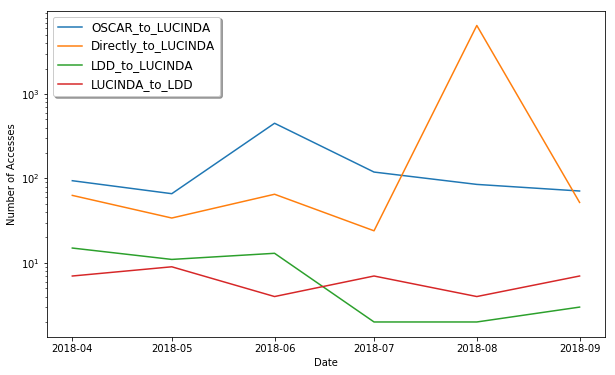

In [56]:
my_plt = plotLines(data_moves, logit= True)
my_plt.legend(loc='upper left', shadow=True, fontsize='large')
my_plt.ylabel('Number of Accesses')
my_plt.xlabel('Date')
my_plt.rcParams['figure.figsize'] = (10,6)
my_plt.show()

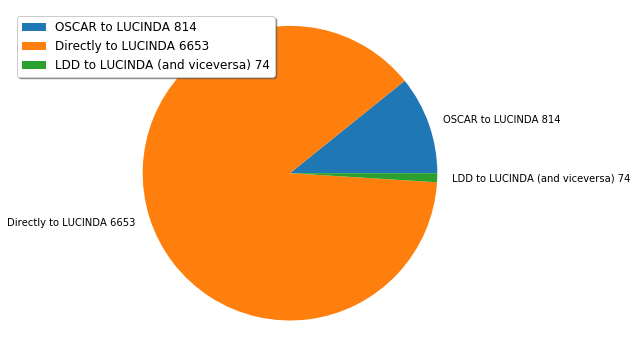

In [83]:
data_pie = {
    "labels": [
        'OSCAR to LUCINDA '+ str(sum(data_moves['OSCAR_to_LUCINDA']['y'])) ,
        'Directly to LUCINDA '+ str(sum(data_moves['Directly_to_LUCINDA']['y'])) ,
        'LDD to LUCINDA (and viceversa) '+ str(sum(data_moves['LDD_to_LUCINDA']['y']) + sum(data_moves['LUCINDA_to_LDD']['y']))
    ],
    "sizes": [
        sum(data_moves['OSCAR_to_LUCINDA']['y']),
        sum(data_moves['Directly_to_LUCINDA']['y']),
        sum(data_moves['LDD_to_LUCINDA']['y']) + sum(data_moves['LUCINDA_to_LDD']['y']),
    ]  
}
my_plt = plotPie(data_pie,opt ={})
my_plt.legend(loc='upper left', shadow=True, fontsize='large')
my_plt.show()


In [20]:
#Using All services with COCI and OCC
data_corpus = {}

In [23]:
data_corpus['COCI'] = buildData([".*(coci\/search|coci\/browse|coci\/api)"], ["REQUEST_URI"], csvpath)

SCANNING /Users/ivan.heibi/opencitations/sci_framework/log_data/csv/oc-2018-04.csv
SCANNING /Users/ivan.heibi/opencitations/sci_framework/log_data/csv/oc-2018-05.csv
SCANNING /Users/ivan.heibi/opencitations/sci_framework/log_data/csv/oc-2018-07.csv
SCANNING /Users/ivan.heibi/opencitations/sci_framework/log_data/csv/oc-2018-06.csv
SCANNING /Users/ivan.heibi/opencitations/sci_framework/log_data/csv/oc-2018-02.csv
SCANNING /Users/ivan.heibi/opencitations/sci_framework/log_data/csv/oc-2018-03.csv
SCANNING /Users/ivan.heibi/opencitations/sci_framework/log_data/csv/oc-2018-08.csv
SCANNING /Users/ivan.heibi/opencitations/sci_framework/log_data/csv/oc-2018-09.csv


In [21]:
data_corpus['OCC'] = buildData(["^(\/search|\/browse|\/api)"], ["REQUEST_URI"], csvpath)

SCANNING /Users/ivan.heibi/opencitations/sci_framework/log_data/csv/oc-2018-04.csv
SCANNING /Users/ivan.heibi/opencitations/sci_framework/log_data/csv/oc-2018-05.csv
SCANNING /Users/ivan.heibi/opencitations/sci_framework/log_data/csv/oc-2018-07.csv
SCANNING /Users/ivan.heibi/opencitations/sci_framework/log_data/csv/oc-2018-06.csv
SCANNING /Users/ivan.heibi/opencitations/sci_framework/log_data/csv/oc-2018-02.csv
SCANNING /Users/ivan.heibi/opencitations/sci_framework/log_data/csv/oc-2018-03.csv
SCANNING /Users/ivan.heibi/opencitations/sci_framework/log_data/csv/oc-2018-08.csv
SCANNING /Users/ivan.heibi/opencitations/sci_framework/log_data/csv/oc-2018-09.csv


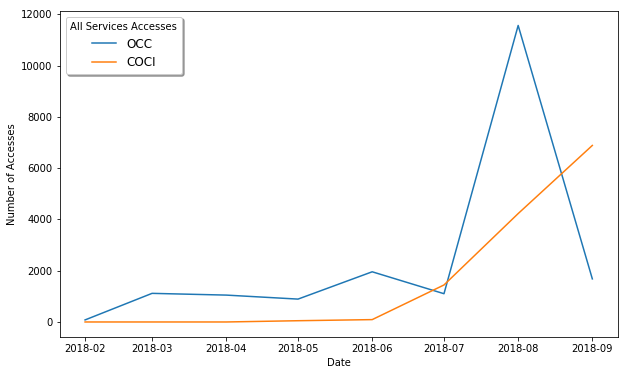

In [24]:
my_plt = plotLines(data_corpus)
my_plt.legend(loc='upper left', shadow=True, fontsize='large', title='All Services Accesses')
my_plt.ylabel('Number of Accesses')
my_plt.xlabel('Date')
my_plt.rcParams['figure.figsize'] = (10,6)
my_plt.show()

In [5]:
# COCI with every single service
data_coci = {}

In [6]:
data_coci['OSCAR'] = buildData(['.*(/coci/search)'], ['REQUEST_URI'], csvpath)

SCANNING /Users/ivan.heibi/opencitations/sci_framework/log_data/csv/oc-2018-05.csv
SCANNING /Users/ivan.heibi/opencitations/sci_framework/log_data/csv/oc-2018-07.csv
SCANNING /Users/ivan.heibi/opencitations/sci_framework/log_data/csv/oc-2018-06.csv
SCANNING /Users/ivan.heibi/opencitations/sci_framework/log_data/csv/oc-2018-08.csv
SCANNING /Users/ivan.heibi/opencitations/sci_framework/log_data/csv/oc-2018-09.csv


In [7]:
data_coci['LUCINDA'] = buildData(['.*(/coci/browse)'], ['REQUEST_URI'], csvpath)

SCANNING /Users/ivan.heibi/opencitations/sci_framework/log_data/csv/oc-2018-05.csv
SCANNING /Users/ivan.heibi/opencitations/sci_framework/log_data/csv/oc-2018-07.csv
SCANNING /Users/ivan.heibi/opencitations/sci_framework/log_data/csv/oc-2018-06.csv
SCANNING /Users/ivan.heibi/opencitations/sci_framework/log_data/csv/oc-2018-08.csv
SCANNING /Users/ivan.heibi/opencitations/sci_framework/log_data/csv/oc-2018-09.csv


In [8]:
data_coci['RAMOSE'] = buildData(['.*(/coci/api)'], ['REQUEST_URI'], csvpath)

SCANNING /Users/ivan.heibi/opencitations/sci_framework/log_data/csv/oc-2018-05.csv
SCANNING /Users/ivan.heibi/opencitations/sci_framework/log_data/csv/oc-2018-07.csv
SCANNING /Users/ivan.heibi/opencitations/sci_framework/log_data/csv/oc-2018-06.csv
SCANNING /Users/ivan.heibi/opencitations/sci_framework/log_data/csv/oc-2018-08.csv
SCANNING /Users/ivan.heibi/opencitations/sci_framework/log_data/csv/oc-2018-09.csv


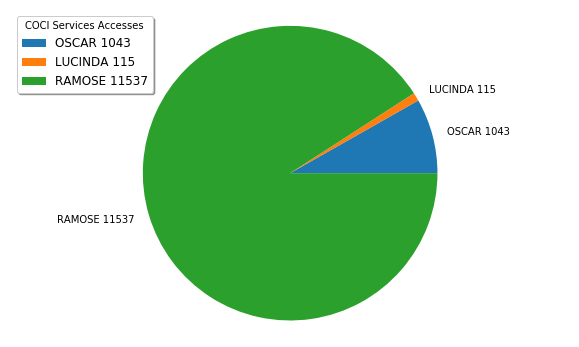

<Figure size 288x288 with 0 Axes>

In [41]:
data_pie = {
    "labels": [
        'OSCAR '+ str(sum(data_coci['OSCAR']['y'])) ,
        'LUCINDA '+ str(sum(data_coci['LUCINDA']['y'])) ,
        'RAMOSE '+ str(sum(data_coci['RAMOSE']['y']))
    ],
    "sizes": [
        sum(data_coci['OSCAR']['y']),
        sum(data_coci['LUCINDA']['y']),
        sum(data_coci['RAMOSE']['y'])
    ]  
}
plotPie(data_pie,opt ={})
plt.legend(loc='upper left', shadow=True, fontsize='large', title='COCI Services Accesses')
figure(figsize=(4,4))
plt.show()

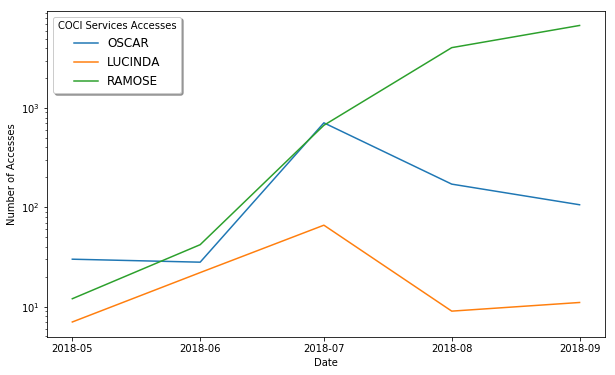

In [53]:
plotLines(data_coci, logit= True)
plt.legend(loc='upper left', shadow=True, fontsize='large', title='COCI Services Accesses')
plt.ylabel('Number of Accesses')
plt.xlabel('Date')
plt.rcParams['figure.figsize'] = (10,6)
plt.show()

In [25]:
# OCC with every single service
data_occ = {}

In [26]:
data_occ['OSCAR'] = buildData(['^((?!coci).)*\/search((?!coci).)*$'], ['REQUEST_URI'], csvpath)

SCANNING /Users/ivan.heibi/opencitations/sci_framework/log_data/csv/oc-2018-04.csv
SCANNING /Users/ivan.heibi/opencitations/sci_framework/log_data/csv/oc-2018-05.csv
SCANNING /Users/ivan.heibi/opencitations/sci_framework/log_data/csv/oc-2018-07.csv
SCANNING /Users/ivan.heibi/opencitations/sci_framework/log_data/csv/oc-2018-06.csv
SCANNING /Users/ivan.heibi/opencitations/sci_framework/log_data/csv/oc-2018-02.csv
SCANNING /Users/ivan.heibi/opencitations/sci_framework/log_data/csv/oc-2018-03.csv
SCANNING /Users/ivan.heibi/opencitations/sci_framework/log_data/csv/oc-2018-08.csv
SCANNING /Users/ivan.heibi/opencitations/sci_framework/log_data/csv/oc-2018-09.csv


In [27]:
data_occ['LUCINDA'] = buildData(['^((?!coci).)*\/browse((?!coci).)*$'], ['REQUEST_URI'], csvpath)

SCANNING /Users/ivan.heibi/opencitations/sci_framework/log_data/csv/oc-2018-04.csv
SCANNING /Users/ivan.heibi/opencitations/sci_framework/log_data/csv/oc-2018-05.csv
SCANNING /Users/ivan.heibi/opencitations/sci_framework/log_data/csv/oc-2018-07.csv
SCANNING /Users/ivan.heibi/opencitations/sci_framework/log_data/csv/oc-2018-06.csv
SCANNING /Users/ivan.heibi/opencitations/sci_framework/log_data/csv/oc-2018-02.csv
SCANNING /Users/ivan.heibi/opencitations/sci_framework/log_data/csv/oc-2018-03.csv
SCANNING /Users/ivan.heibi/opencitations/sci_framework/log_data/csv/oc-2018-08.csv
SCANNING /Users/ivan.heibi/opencitations/sci_framework/log_data/csv/oc-2018-09.csv


In [28]:
data_occ['RAMOSE'] = buildData(['^((?!coci).)*\/api((?!coci).)*$'], ['REQUEST_URI'], csvpath)

SCANNING /Users/ivan.heibi/opencitations/sci_framework/log_data/csv/oc-2018-04.csv
SCANNING /Users/ivan.heibi/opencitations/sci_framework/log_data/csv/oc-2018-05.csv
SCANNING /Users/ivan.heibi/opencitations/sci_framework/log_data/csv/oc-2018-07.csv
SCANNING /Users/ivan.heibi/opencitations/sci_framework/log_data/csv/oc-2018-06.csv
SCANNING /Users/ivan.heibi/opencitations/sci_framework/log_data/csv/oc-2018-02.csv
SCANNING /Users/ivan.heibi/opencitations/sci_framework/log_data/csv/oc-2018-03.csv
SCANNING /Users/ivan.heibi/opencitations/sci_framework/log_data/csv/oc-2018-08.csv
SCANNING /Users/ivan.heibi/opencitations/sci_framework/log_data/csv/oc-2018-09.csv


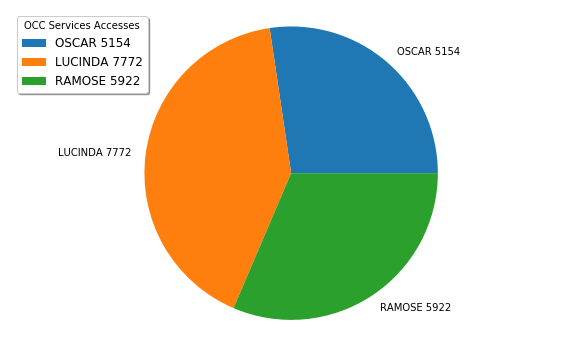

<Figure size 288x288 with 0 Axes>

In [24]:
data_pie = {
    "labels": [
        'OSCAR '+ str(sum(data_occ['OSCAR']['y'])) ,
        'LUCINDA '+ str(sum(data_occ['LUCINDA']['y'])) ,
        'RAMOSE '+ str(sum(data_occ['RAMOSE']['y']))
    ],
    "sizes": [
        sum(data_occ['OSCAR']['y']),
        sum(data_occ['LUCINDA']['y']),
        sum(data_occ['RAMOSE']['y'])
    ]  
}
plotPie(data_pie,opt ={})
plt.legend(loc='upper left', shadow=True, fontsize='large', title='OCC Services Accesses')
figure(figsize=(4,4))
plt.show()

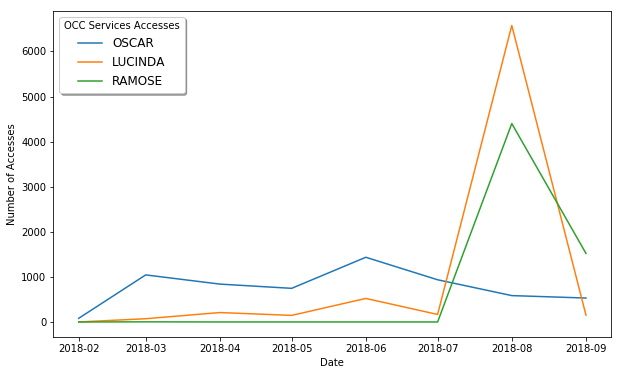

In [29]:
my_plt = plotLines(data_occ)
my_plt.legend(loc='upper left', shadow=True, fontsize='large', title='OCC Services Accesses')
my_plt.ylabel('Number of Accesses')
my_plt.xlabel('Date')
my_plt.show()

In [99]:
ip_dict = {}
for elem in data_occ['LUCINDA']['value'][5]:
    if elem['REMOTE_ADDR'] in ip_dict:
        ip_dict[elem['REMOTE_ADDR']] += 1
    else:
        ip_dict[elem['REMOTE_ADDR']] = 0
        

In [100]:
ip_dict

{'155.69.120.23': 7,
 '129.78.56.135': 2,
 '139.57.226.246': 1,
 '150.254.146.15': 1,
 '176.138.207.77': 2,
 '212.44.19.45': 5,
 '146.164.150.200': 0,
 '217.91.125.166': 6464,
 '77.178.81.121': 6,
 '194.225.47.200': 0,
 '141.26.189.222': 2,
 '94.164.103.164': 8,
 '129.105.125.81': 4,
 '77.173.238.191': 2,
 '86.63.104.55': 0,
 '94.161.152.38': 3,
 '69.38.215.122': 1,
 '12.252.186.214': 0,
 '2.86.194.103': 0,
 '188.218.74.195': 8,
 '85.38.104.36': 2,
 '193.49.18.110': 1,
 '131.94.186.123': 4,
 '66.249.88.48': 0,
 '109.24.208.160': 2,
 '2.154.156.12': 0,
 '80.176.234.72': 4,
 '202.168.158.130': 3,
 '130.75.173.52': 0,
 '194.56.165.5': 1,
 '87.15.231.199': 0,
 '139.57.229.247': 6,
 '91.159.206.137': 1,
 '137.56.177.234': 1,
 '147.65.4.95': 0}

In [ ]:
plot_log.ipynb